# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

bkgd = np.random.normal(0,2,10**6)
signal = np.random.uniform(0,20,10**6)

<ipython-input-2-d4995a5caf85>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


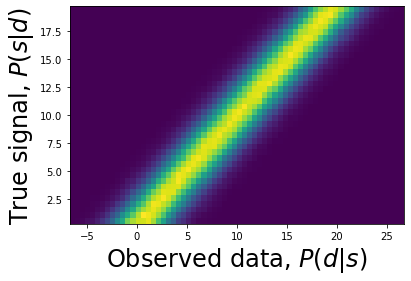

In [2]:
# Code given in assignment, creates 2d histogram
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

## Problem 1b
#### Select a true injected signal and plot  𝑃(𝑑|𝑠) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

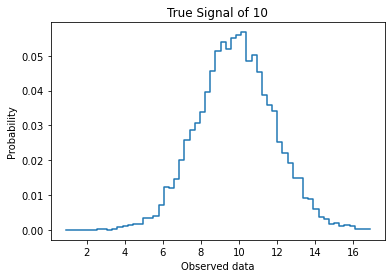

In [3]:
# Finds where signal is within 0.1 of 10 and then finds the corresponding points in data
his = np.histogram(data[np.where(abs(signal - 10) < 0.1)],bins=60)

# weird first part is to convert from histogram format to step format
plt.step((his[1]+(his[1][1]-his[1][0])/2)[:-1], his[0]/sum(his[0]))
plt.title("True Signal of 10")
plt.xlabel("Observed data")
plt.ylabel("Probability")
plt.show()

This plot shows the distribution of data found when the true signal was close to 10. The shape is Gaussian which makes sense as the signal of 10 is added to a Gaussian background with a standard deviation of 2, matching the shape of the observed data. The plot is also centered around the true signal of 10, which makes sense as the background data is centered around 0 and therefore doesn't change the average when added to the signal data.
## Problem 1c
#### Select an observed data value and plot  𝑃(𝑠|𝑑) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

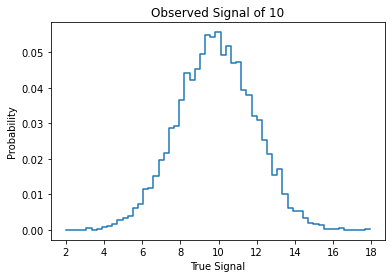

In [4]:
# Finds where data is within 0.1 of 10 and then finds the corresponding points in signal
his = np.histogram(signal[np.where(abs(data - 10) < 0.1)],bins=60)

# weird first part is to convert from histogram format to step format
plt.step((his[1]+(his[1][1]-his[1][0])/2)[:-1], his[0]/sum(his[0]))
plt.title("Observed Signal of 10")
plt.xlabel("True Signal")
plt.ylabel("Probability")
plt.show()

This plot shows the distribution of data found when the observed signal was close to 10. The shape is decently Gaussian which makes sense, as it is theoretically composed of small slices of Gaussians that grow further away at a constant rate proportional to the change in the true signal as the true signal increases or decreases.
# Problem 2
#### Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. Reproduce the graphs above. Lastly overplot the  𝑃(𝑑|𝑠)  and  𝑃(𝑠|𝑑)  plots. Why are they not centered on the same value? Explain carefully.

<ipython-input-5-05eba7a23b64>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


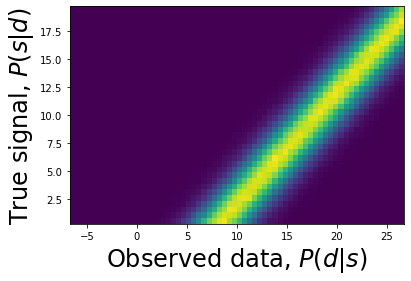

In [5]:
# Same steps but with mean of 8 instead of 0
bkgd = np.random.normal(8,2,10**6)
signal = np.random.uniform(0,20,10**6)

# Code given in assignment, creates 2d histogram
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

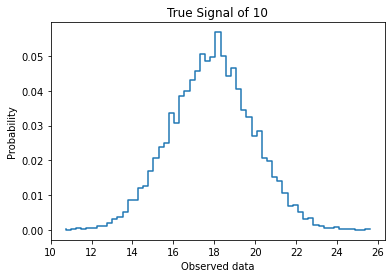

In [6]:
# P(d|s)
# Finds where signal is within 0.1 of 10 and then finds the corresponding points in data
his = np.histogram(data[np.where(abs(signal - 10) < 0.1)],bins=60)

# weird first part is to convert from histogram format to step format
plt.step((his[1]+(his[1][1]-his[1][0])/2)[:-1], his[0]/sum(his[0]))
plt.title("True Signal of 10")
plt.xlabel("Observed data")
plt.ylabel("Probability")
plt.show()

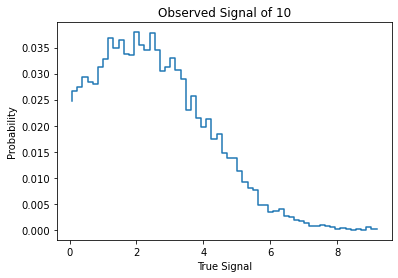

In [7]:
# P(s|d)
# Finds where data is within 0.1 of 10 and then finds the corresponding points in signal
his = np.histogram(signal[np.where(abs(data - 10) < 0.1)],bins=60)

# weird first part is to convert from histogram format to step format
plt.step((his[1]+(his[1][1]-his[1][0])/2)[:-1], his[0]/sum(his[0]))
plt.title("Observed Signal of 10")
plt.xlabel("True Signal")
plt.ylabel("Probability")
plt.show()

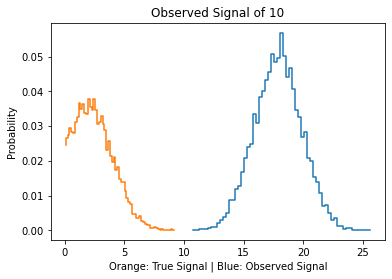

In [8]:
his = np.histogram(data[np.where(abs(signal - 10) < 0.1)],bins=60)
plt.step((his[1]+(his[1][1]-his[1][0])/2)[:-1], his[0]/sum(his[0]))

his = np.histogram(signal[np.where(abs(data - 10) < 0.1)],bins=60)
plt.step((his[1]+(his[1][1]-his[1][0])/2)[:-1], his[0]/sum(his[0]))

plt.title("Observed Signal of 10")
plt.xlabel("Orange: True Signal | Blue: Observed Signal")
plt.ylabel("Probability")
plt.show()

The two plots of P(d|s) and P(s|d) are not centered around the same value because the background's mean is 8 instead of 0, meaning the background shifts the observed data from the signal data by a factor of 8 on average. For P(d|s) the true signal of 10 corresponds with observed data centered around 18 because the observed data is the signal data and background data combined, adding the background data's mean of 8 to the signal data. For P(s|d), the observed data of 10 corresponds to signal data centered around 2ish, due to the observed data being a combination of the signal data and the background data with the background data having a nonzero mean that changes the corresponding signal data by 8 on average.